# Review

1. You are taking a one question quiz, but you quickly realize that you don't understand the material. However, you have a guessing machine that will guess correctly 80% of the time. Your teacher will allow you to take the quiz as many times as you want.  
    a. What is the probability of getting the question correct after taking the quiz 7 times?

    b. How many times do you have to take the quiz before you are 99.99999999999999% sure you'll get it right?  
    *Hint: Write code!*
    

  2. The code below describes the probability distribution `P_2(x)` for some random variable X.  
    a. What is the sample space?

    b. What is P_2(28)?

    c. What is the expected value of this random variable?
    

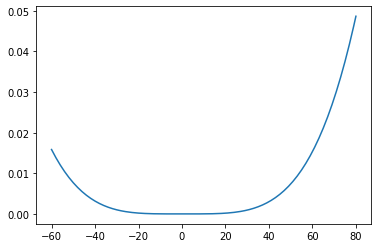

In [6]:
import numpy as np

X = np.arange(-60,81)
Y = np.abs(X**4 - X**3 + X**2)
Y = Y / np.sum(Y)

from matplotlib import pyplot as plt
plt.plot(X,Y)

def P_2(x):
    for i in range(len(X)):
        if X[i] == x:
            return Y[i]
    return 0

  3. You're buying sneakers online, and two different sellers have the pair you want. Seller A has a rating of 9.5/10, but only has 10 reviews. Seller B has a rating of 9.0/10 with 200 reviews. Which seller has a better "true" rating?  
  *Hint: Think about sample means!*
  

  4. How does increasing the number of samples vs sample size affect the sampling distribution of sample means?
  

  5. A psychologist is conducting a study on the relationship between student stress and academic performance. Would it be more practical to increase the number of samples or to increase the sample size? Explain your reasoning.
      

# Statistical Inference
So far we've learned many ways to *describe* a dataset, but our conclusions are valid only for the *samples* that we look at. How can we start making statements about the *population*, so that we can make informed decisions and predictions?

The basis of **statistical inference** lies in analyzing sampling distributions.


  6. Think back on the sampling distributions of penguin bill lengths from the last worksheet. Would it be correct to say that the mean of the sampling distribution (the statistic) was *exactly* the same as the actual mean (the population parameter)? Why or why not?
  

## Estimation
A single number is rarely enough information -- how much could you tell about a distribution if you know just the mean? We also want to have some measure of variability.

7. An ornithologist is researching sparrows in New York City. After conducting multiple studies, they conclude that the sampling distribution of sample means of sparrow weight has a mean of 1oz and a standard deviation of 0.15oz.  
  a. Give a **point estimate** (a single number) of the actual weight of an average sparrow.

  b. Give an **interval estimate** (a range) of the actual weight of an average sparrow.

  8. What attributes of a sampling distribution could you use to construct a good **interval estimate**?

  9. What gives you more information: a point estimate or an interval estimate?

## Confidence Intervals
A **confidence interval** is an interval estimate that we believe with some degree of confidence to contain the population parameter.

### Calcuating Confidence Intervals
Many methods of calculating confidence intervals involve making strong assumptions about the distribution of the population data and finding margins of error around point estimates. However, in this class we will focus on another method of calculating intervals called **bootstrapping**.

### Bootstrap
The bootstrap is based on *the law of large numbers*, and is very simple -- you simply treat your sample as the population, and **resample** it many times to gather information about the variability of your statistic.

  10. Based on the short description above, what might be a major source of error for the bootstrap method? 

### Pengalien Bootstrap
This time the Pengaliens are interested in the body mass of Earth's penguins, which are all conveniently recorded in our penguins dataset.

  11. What is the *median* body mass of all penguins on Earth?

In [2]:
#!pip3 install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd

penguins = load_penguins()

  12. The Pengaliens are running low on energy, and they can only beam up one more sample of 50 penguins. They will have to base all their estimates on this one sample.  
  Create a sample of 50 penguins. What is the median body mass of this sample?

13. The next step of the bootstrap method is to **resample** -- the Pengaliens will generate more samples *of the same size (50)* from their one sample of 50 penguins. However, these **bootstrap samples** are taken *with replacement*. The same penguin is allowed to show up in a bootstrap penguin more than once!  

   a. Write a method `bootstrap_sample()` that returns the median body mass of a bootstrap sample.  
   *Hint: Read the documentation for `DataFrame.sample()`*

  b. Write a method `bootstrap_samples(N)` that returns a list of the results of running `bootstrap_sample()` N times.

### Constructing the Confidence Interval
We can now use the bootstrap differences that we just calculated to get a confidence interval! All we have to do is sort the list from `bootstrap_samples`. Our X% confidence interval is the middle X% of that list.


14. Suppose that we wanted the 80% confidence interval. We would then use the 10th percentile and the 90th percentile as the bounds for our confidence interval. What percentiles would we use if we wanted the 90% confidence interval?

  15. Write code! If we resampled 1000 times:  
  *Hint: Look at documentation for `DataFrame.quantile`!*  
  
    a. What is the 90% confidence interval of median penguin body mass?
    
    b. What is the 95% confidence interval of median penguin body mass?
    

  16. What happens to a confidence interval as you increase the degree of confidence? Why does that happen?
  

### The Power of Bootstrapping
Bootstrapping works for many different statistics! We just calculated the confidence interval for median body mass, but we can replicate the same steps if we were interested in means, proportions, ratios, standard deviations, and so on.

## Summary Box
For your benefit! This will help you better understand

  17. Suppose you are a researcher with a single sample of *n* subjects. Describe the steps you would take to calculate the 99% confidence interval using the bootstrap method.